In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
!pip install prophet
import prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [280]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Loading Dataset***

In [312]:
df = pd.read_csv('/content/drive/MyDrive/archive (2)/BAJAJFINSV.csv')
df.sort_index(inplace=True)
print(df.shape)

(3201, 15)


In [313]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [314]:
null = df.isnull().sum().sort_values(ascending = False)
null

Trades                745
Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Deliverable Volume      0
%Deliverble             0
dtype: int64

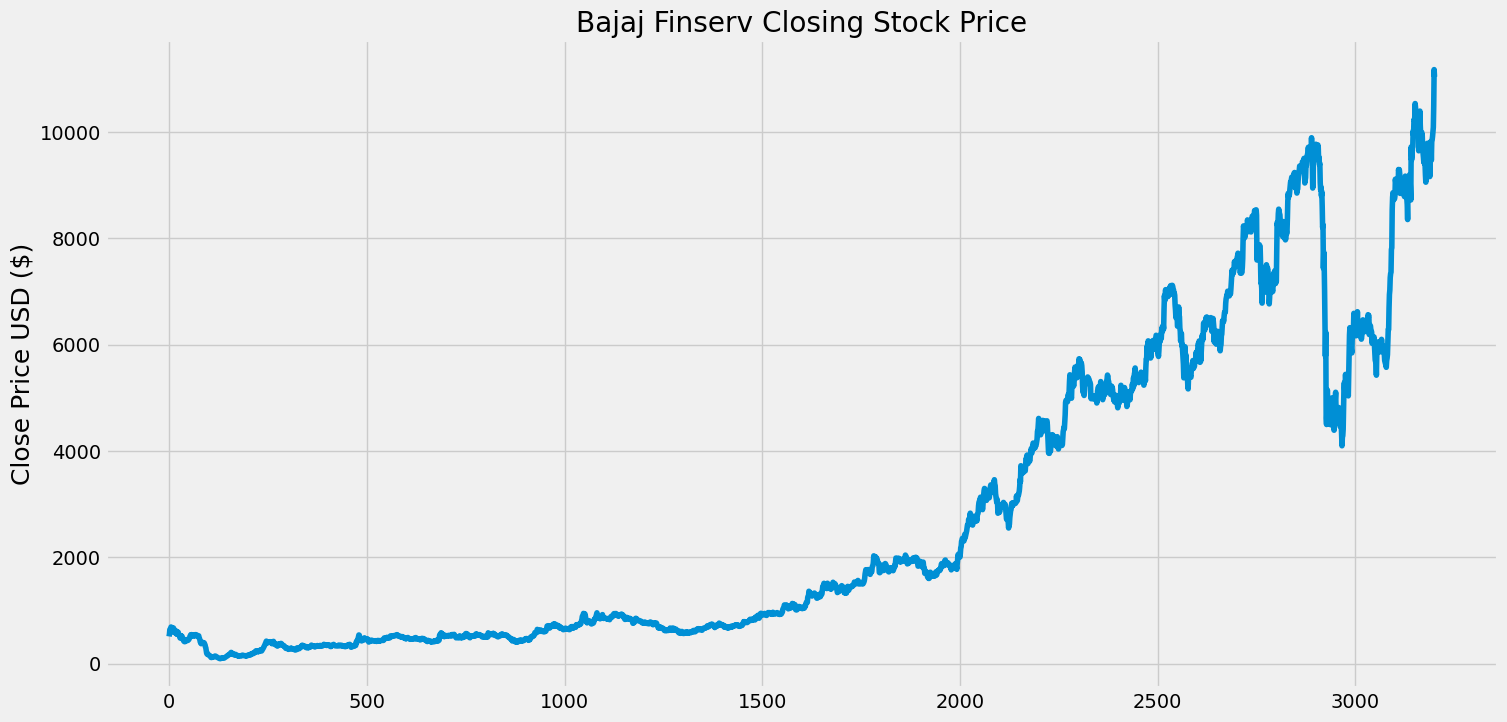

In [315]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Bajaj Finserv Closing Stock Price")
plt.plot(df["Close"])
# from matplotlib.dates import DateFormatter
# date_form = DateFormatter("%Y")
# plt.gca().xaxis.set_major_formatter(date_form)  # Corrected line
# plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

**Train Test Split**

In [356]:
df = df[['Date','Close']]
df = df.rename(columns = {"Date":"ds","Close":"y"})

train_set, test_set= np.split(df, [int(.82*len(df))])



train_set.head()

,ds,y
0,2008-05-26,509.10
1,2008-05-27,554.65
2,2008-05-28,640.95
3,2008-05-29,632.40
4,2008-05-30,644.00


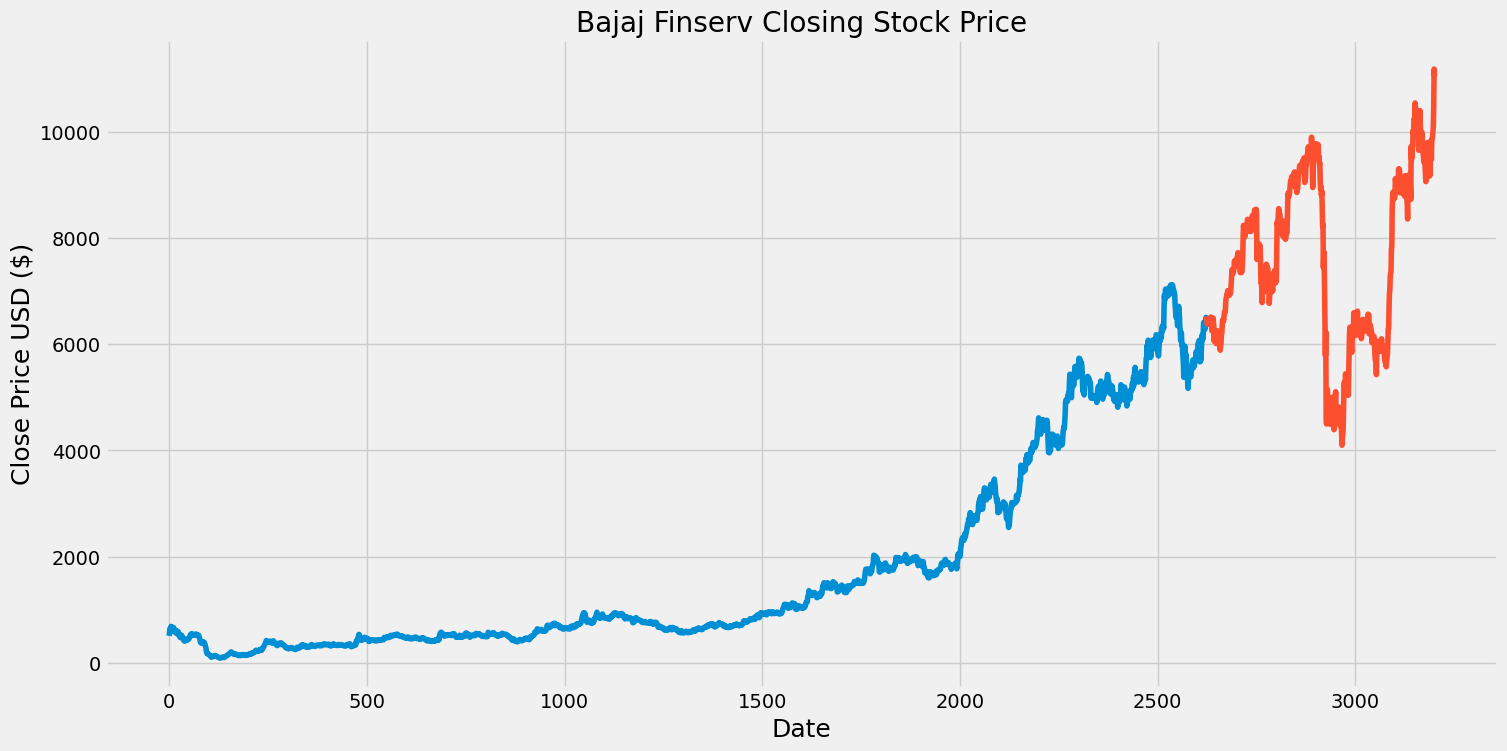

In [317]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Bajaj Finserv Closing Stock Price")
plt.plot(train_set['y'])
plt.plot(test_set['y'])
# Format the x-axis labels as year
# from matplotlib.dates import DateFormatter
# date_form = DateFormatter("%Y")
# plt.gca().xaxis.set_major_formatter(date_form)  # Corrected line
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

***Training Prophet***

In [287]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(train_set)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4m5bx_q6/ewx57fmp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4m5bx_q6/gpbs8eaf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5218', 'data', 'file=/tmp/tmp4m5bx_q6/ewx57fmp.json', 'init=/tmp/tmp4m5bx_q6/gpbs8eaf.json', 'output', 'file=/tmp/tmp4m5bx_q6/prophet_modelxg942pk7/prophet_model-20230624134044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:40:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:40:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


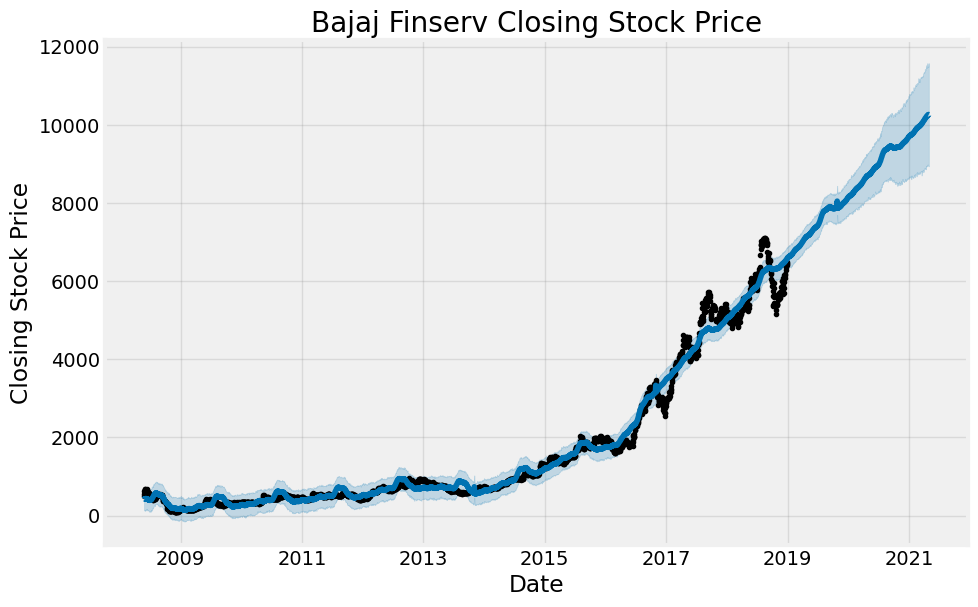

In [288]:
# future = m.make_future_dataframe(periods=365)
# df = df[['Date','Close']]
# df = df.rename(columns = {"Date":"ds","Close":"y"})
predictions=m.predict(df)
m.plot(predictions)
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.title("Bajaj Finserv Closing Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

***Result on test set***

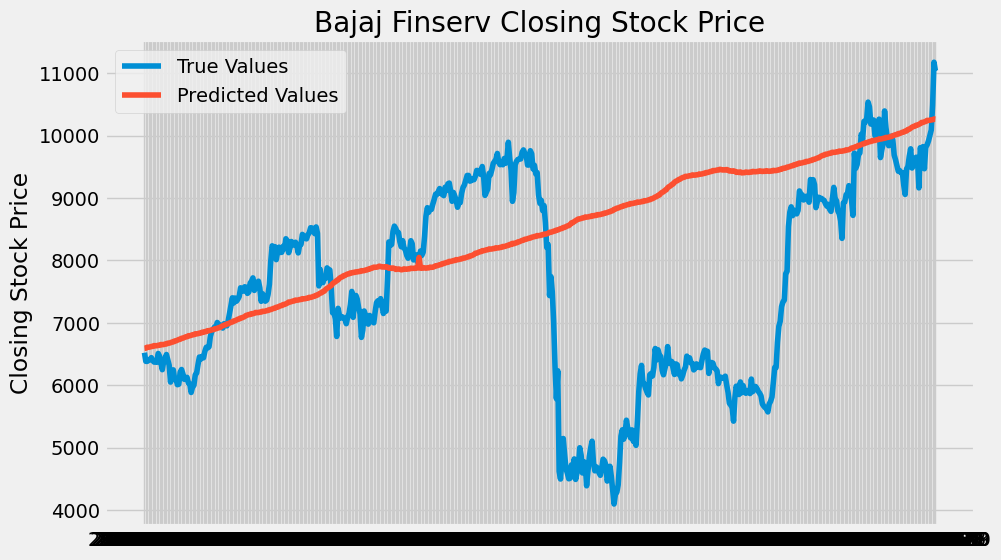

In [289]:
predictions2=m.predict(test_set)
fig, ax = plt.subplots(figsize=(10, 6))

# # Plot true values from the test set
ax.plot(test_set['ds'], test_set['y'], label='True Values')

# Plot predicted values on the test set
ax.plot(test_set['ds'], predictions2['yhat'], label='Predicted Values')



plt.title("Bajaj Finserv Closing Stock Price")
# plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.legend()
plt.show()

**Mean Absolute Eroor**

In [290]:
from sklearn import metrics
# for test dataset
print(metrics.mean_absolute_error(test_set['y'],predictions2['yhat']))


1459.2837377356768


In [291]:
# for training dataset
print(metrics.mean_absolute_error(df['y'],m.predict(df)['yhat']))

382.48706131499256


**Neural Prophet**

In [292]:
!pip install neuralprophet
from neuralprophet import NeuralProphet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached holidays-0.21.13-py3-none-any.whl (378 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: holidays
    Found existing installation: holidays 0.27.1
    Uninstalling holidays-0.27.1:
      Successfully uninstalled holidays-0.27.1
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uni

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


**Training NeuralProphet**

In [357]:
model = NeuralProphet()
metrics = model.fit(train_set,freq="B")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.36% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.36% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32

Finding best initial lr:   0%|          | 0/235 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [358]:
predictions2 = model.predict(test_set)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 93.588% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 93.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 93.588% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 93.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 82it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


**Mean Absolute error**

In [359]:
from sklearn import metrics
predictions2=model.predict(test_set)
print(metrics.mean_absolute_error(test_set['y'],predictions2['yhat1']))


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 93.588% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 93.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 93.588% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 93.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 82it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


1581.4380131607454


In [360]:
print(metrics.mean_absolute_error(train_set['y'],model.predict(train_set)['yhat1']))

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.36% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.36% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.36% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.36% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 82it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


159.97590567542284


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 93.588% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 93.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 93.588% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 93.588% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 82it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


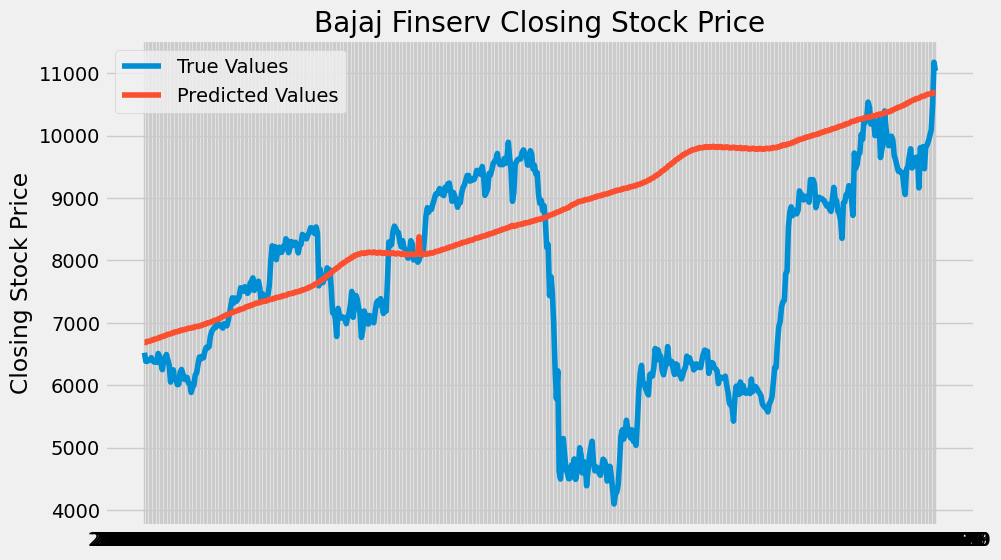

In [361]:
predictions3=model.predict(test_set)['yhat1']
fig, ax = plt.subplots(figsize=(10, 6))

# # Plot true values from the test set
ax.plot(test_set['ds'], test_set['y'], label='True Values')

# Plot predicted values on the test set
ax.plot(test_set['ds'], predictions3, label='Predicted Values')



plt.title("Bajaj Finserv Closing Stock Price")
# plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.legend()
plt.show()

**Using LSTM bsed Approach**

In [310]:
data=  pd.read_csv('/content/drive/MyDrive/archive (2)/BAJAJFINSV.csv')

In [311]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [299]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 4, 128)            66560     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 25)                1625      
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [300]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=50, epochs=100)

Epoch 1/100
52/52 [==============================] - 12s 19ms/step - loss: 16356085.0000
Epoch 2/100
52/52 [==============================] - 1s 19ms/step - loss: 16114184.0000
Epoch 3/100
52/52 [==============================] - 1s 19ms/step - loss: 15798067.0000
Epoch 4/100
52/52 [==============================] - 1s 18ms/step - loss: 15390275.0000
Epoch 5/100
52/52 [==============================] - 1s 18ms/step - loss: 14898293.0000
Epoch 6/100
52/52 [==============================] - 1s 19ms/step - loss: 14338650.0000
Epoch 7/100
52/52 [==============================] - 1s 20ms/step - loss: 13724435.0000
Epoch 8/100
52/52 [==============================] - 1s 25ms/step - loss: 13056678.0000
Epoch 9/100
52/52 [==============================] - 2s 37ms/step - loss: 12351880.0000
Epoch 10/100
52/52 [==============================] - 2s 37ms/step - loss: 11623532.0000
Epoch 11/100
52/52 [==============================] - 2s 37ms/step - loss: 10878176.0000
Epoch 12/100
52/52 [=========

**Mean Absolute Eroor**

In [301]:
print(metrics.mean_absolute_error(ytrain,model.predict(xtrain)))

59.49729618400336


In [302]:
print(metrics.mean_absolute_error(ytest,model.predict(xtest)))

52.83692128304946


In [354]:
df2 = model.predict(xtest)
df2 = pd.DataFrame(df2)

# Optional: Assign column names
df2.columns = ['Predicted']
df_test = df_test.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
fixed_rows = 570
df2 = df2[:fixed_rows]
df_test = df_test[:fixed_rows]
df_test =  pd.concat([df_test, df2],axis=1)
df_test

,Date,Close,Predicted
0,2019-01-01,6521.95,729.917908
1,2019-01-02,6384.00,775.096436
2,2019-01-03,6383.30,4882.605957
3,2019-01-04,6410.45,916.710144
4,2019-01-07,6407.15,184.993774
...,...,...,...
565,2021-04-13,9806.70,607.096497
566,2021-04-15,9739.70,678.050537
567,2021-04-16,9824.75,6087.316895
568,2021-04-19,9469.90,838.736755


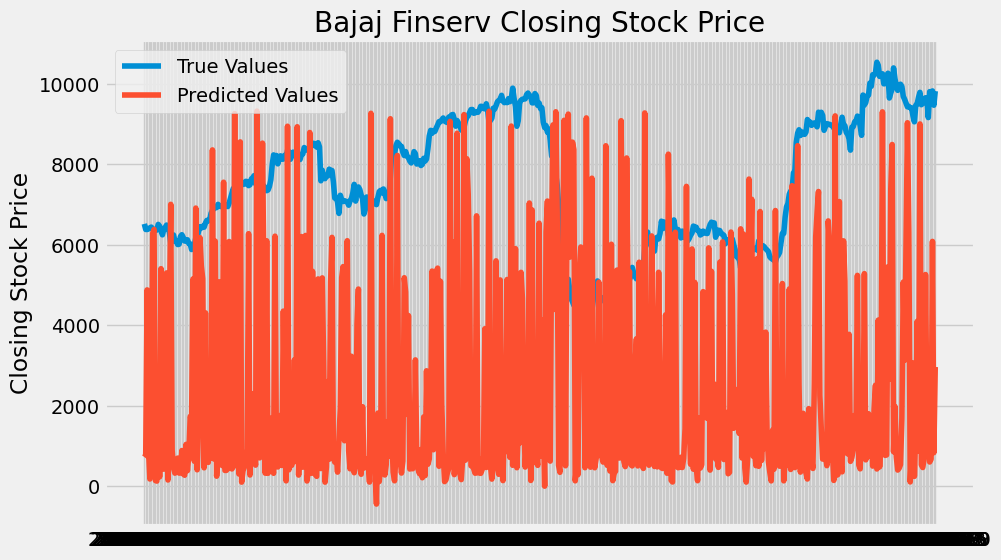

In [355]:
fig, ax = plt.subplots(figsize=(10, 6))

# # Plot true values from the test set
ax.plot(df_test['Date'],df_test['Close'], label='True Values')

# Plot predicted values on the test set
ax.plot(df_test['Date'], df_test['Predicted'], label='Predicted Values')



plt.title("Bajaj Finserv Closing Stock Price")
# plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.legend()
plt.show()


**Using Arima**

In [339]:
!pip install pmdarima
df = pd.read_csv('/content/drive/MyDrive/archive (2)/BAJAJFINSV.csv')
df = df[["Date", "Close"]]
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Close'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [353]:
from pmdarima import auto_arima
df_train, df_test= np.split(df, [int(.82*len(df))])
df_test

,Date,Close
2624,2019-01-01,6521.95
2625,2019-01-02,6384.00
2626,2019-01-03,6383.30
2627,2019-01-04,6410.45
2628,2019-01-07,6407.15
...,...,...
3196,2021-04-26,10001.75
3197,2021-04-27,10091.35
3198,2021-04-28,10489.30
3199,2021-04-29,11176.55


**Training Arima Pipeline**

In [274]:
import pmdarima as pm

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
# Define and fit your pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(suppress_warnings=True,
                           trace=True))
])

pipeline.fit(df_train['Close'])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-16355.341, Time=9.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16217.155, Time=0.97 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16327.398, Time=2.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16316.321, Time=5.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16216.124, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-16353.361, Time=6.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-16328.455, Time=10.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-16352.823, Time=6.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-16352.216, Time=5.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16348.650, Time=4.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-16354.549, Time=6.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-16350.841, Time=3.57 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-16352.697, Time=3.49 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-16355.928, Time=0.39 sec
 ARI

Pipeline(steps=[('boxcox', BoxCoxEndogTransformer(lmbda2=1e-06)),
                ('arima', AutoARIMA(trace=True))])

**MSE**

In [276]:
forecasts = pipeline.predict(df_test['Close'].shape[0])
print(metrics.mean_absolute_error(df_test['Close'],forecasts))

1579.9961135534338


In [277]:
print(metrics.mean_absolute_error(df_train['Close'],pipeline.predict(df_train['Close'].shape[0])))

4809.176581604948


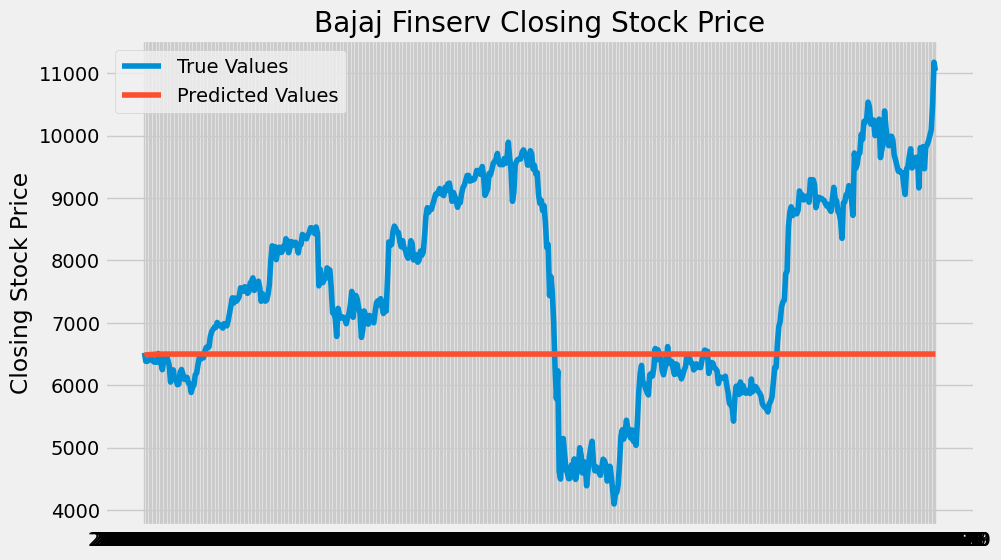

In [278]:
fig, ax = plt.subplots(figsize=(10, 6))

# # Plot true values from the test set
ax.plot(df_test['Date'],df_test['Close'], label='True Values')

# Plot predicted values on the test set
ax.plot(df_test['Date'], forecasts, label='Predicted Values')



plt.title("Bajaj Finserv Closing Stock Price")
# plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.legend()
plt.show()
